In [120]:
import numpy as np
import pandas as pd

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
%matplotlib inline
from matplotlib import pyplot

Before we look at correlation methods, let’s define a dataset we can use to test the methods.

We will generate 1,500 samples of two two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 30. The second variable will be values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 20.

We will use the randn() function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.

The pseudorandom number generator is seeded to ensure that we get the same sample of numbers each time the code is run.

Generatng dataset with Positive correlation

d1: mean=101.554 stdv=29.851
d2: mean=151.104 stdv=35.806


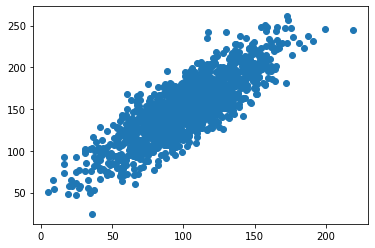

In [4]:
# seed random number generator
seed(1)
# prepare data
d1 = 30 * randn(1500) + 100
d2 = d1 + (20 * randn(1500) + 50)
# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))
# plot
pyplot.scatter(d1, d2)
pyplot.show()

In [6]:
# d1 and d2 are numpy.ndarrays
type(d1)

numpy.ndarray

In [7]:
d1

array([148.73036091,  81.64730759,  84.15484743, ...,  93.70459154,
       156.91482062,  58.55826541])

In [11]:
# let's convert to a dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})
df.head()

,Column1,Column2
0,148.730361,224.754858
1,81.647308,125.399465
2,84.154847,128.730273
3,67.810941,155.069203
4,125.962229,163.104757


Generatng dataset with no correlation

d1: mean=99.683 stdv=29.884
d2: mean=99.572 stdv=30.485


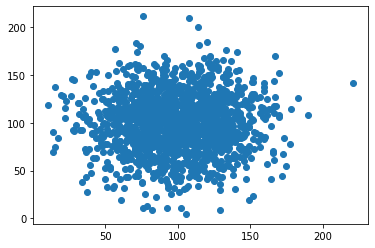

In [22]:
# seed random number generator
# we want diffrent random numbers now
seed(24)
# prepare data
d1 = 30 * randn(1500) + 100
# we want diffrent random numbers now
seed(3)
d2 = 30 * randn(1500) + 100
# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))
# plot
pyplot.scatter(d1, d2)
pyplot.show()

In [23]:
# let's convert to a dataframe
df2 = pd.DataFrame({'Column1': d1, 'Column2': d2})
df2.head()

,Column1,Column2
0,139.876365,153.658854
1,76.898996,113.095296
2,90.511589,102.894924
3,70.275688,44.095219
4,67.875512,91.678354


Generatng dataset with Negative correlation

d1: mean=99.683 stdv=29.884
d2: mean=-50.277 stdv=34.856


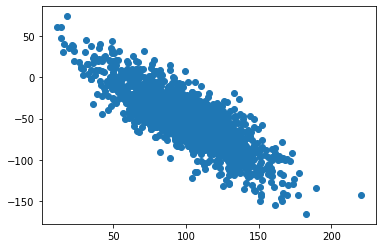

In [25]:
# seed random number generator
# we want diffrent random numbers now
seed(24)
# prepare data
d1 = 30 * randn(1500) + 100
d2 = d1 * -1 + (20 * randn(1500) + 50)
# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))
# plot
pyplot.scatter(d1, d2)
pyplot.show()

In [28]:
df3 = pd.DataFrame({'Column1': d1, 'Column2': d2})
df3.head()

,Column1,Column2
0,139.876365,-77.836471
1,76.898996,-26.489720
2,90.511589,-6.719346
3,70.275688,-38.765919
4,67.875512,-30.881949


## Pandas .corr()

Pandas offers corr() function that we can use it with Pandas series as shown below. 

Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

Syntax: DataFrame.count(axis=0, level=None, numeric_only=False)

Parameters: 
methods : 
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation

min_periods : Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation

Returns: count :y : DataFrame

#### Pearson Correlation with Pandas corr()

Pandas corr() for the whole dataframe:

In [29]:
df.corr(method ='pearson') 

,Column1,Column2
Column1,1.000000,0.831948
Column2,0.831948,1.000000


This is what we expected for df as it was created to show positive correlation.

Correlation coefficient close to +1: Large Positive relationship

In [32]:
df2.corr(method ='pearson') 

,Column1,Column2
Column1,1.000000,0.023526
Column2,0.023526,1.000000


df2 was created to show week/no correlation. This is what correlation coefficient confirms. 

Correlation coefficient close to 0: No relationship

In [33]:
df3.corr(method ='pearson') 

,Column1,Column2
Column1,1.000000,-0.830723
Column2,-0.830723,1.000000


df3 was created to show negative correlation. This is what correlation coefficient confirms.

Correlation coefficient close to -1: Large Negative relationship

#### Kendall Correlation with Pandas corr()

In [30]:
df.corr(method ='kendall') 

,Column1,Column2
Column1,1.000000,0.615858
Column2,0.615858,1.000000


#### Sperman Correlation with Pandas corr()

In [31]:
df.corr(method ='spearman') 

,Column1,Column2
Column1,1.000000,0.808668
Column2,0.808668,1.000000


## SciPy stats correlation

Generating a test dataset  for SciPy

d1: mean=100.408 stdv=30.396
d2: mean=-51.359 stdv=36.784


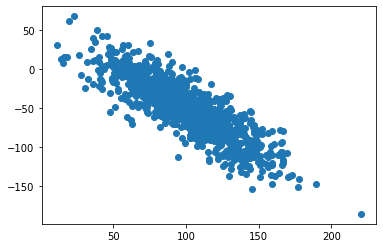

In [98]:
# seed random number generator
seed(24)

# prepare data
d1 = 30 * randn(1000) + 100
d2 = d1 * -1 + (20 * randn(1000) + 50)

# let's convert to a dataframe
df = pd.DataFrame({'Column1': d1, 'Column2': d2})

# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
pyplot.scatter(d1, d2)
pyplot.show()

In [36]:
import scipy

### SciPy stats correlation: Spearman

In [76]:
scipy.stats.spearmanr(df)

SpearmanrResult(correlation=-0.8516826716826716, pvalue=2.5840062112066416e-282)

In [77]:
corr, pvalue = scipy.stats.spearmanr(df)

print('Correlation coefficient: ', corr)
print('P-value: ', pvalue)

Correlation coefficient:  -0.8516826716826716
P-value:  2.5840062112066416e-282


In [78]:
# no need to convert outputs to strings

# corr, pvalue = scipy.stats.spearmanr(df)

# corr = corr.astype(np.str)
# pvalue = pvalue.astype(np.str)
# print('Correlation coefficient: ' + corr, 'P-value: ' + pvalue)

### SciPy stats correlation: Pearson

In [79]:
scipy.stats.pearsonr(df['Column1'], df['Column2'])

(-0.8494613723907997, 2.370666878292138e-279)

In [94]:
corr, pvalue = scipy.stats.pearsonr(df['Column1'], df['Column2'])

print('Correlation coefficient: ', corr)
print('P-value: ', pvalue)
print('P-value without e notation: ', '{:0.300f}'.format(pvalue))

Correlation coefficient:  -0.8494613723907997
P-value:  2.370666878292138e-279
P-value without e notation:  0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002370666878292137817821


### SciPy stats correlation: Kendall

In [82]:
corr, pvalue = scipy.stats.kendalltau(df['Column1'], df['Column2'])

print('Correlation coefficient: ', corr)
print('P-value: ', pvalue)

Correlation coefficient:  -0.6591271271271271
P-value:  7.67043823229759e-214


## Data Visualisation

#### Scatterplot Matrix

A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. Drawing all these scatterplots together is called a scatterplot matrix.

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

With scater_matrix you can pick between ‘kde’ and ‘hist’ for either Kernel Density Estimation or Histogram plot in the diagonal.

The first visualisation below uses ‘hist’ and returns Histogram plots. Parameter diagonal is set to ‘hist’ by default.

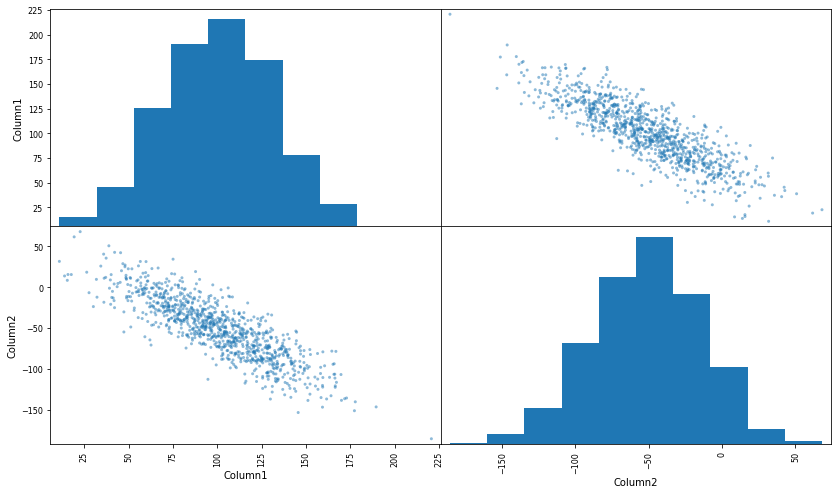

In [106]:
# Scatterplot Matrix - Histogram plots

# import pandas
# from matplotlib import pyplot

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (14,8))
pyplot.show()

Bellow visualisation uses ‘kde’ and returns Kernel Density Estimation. 

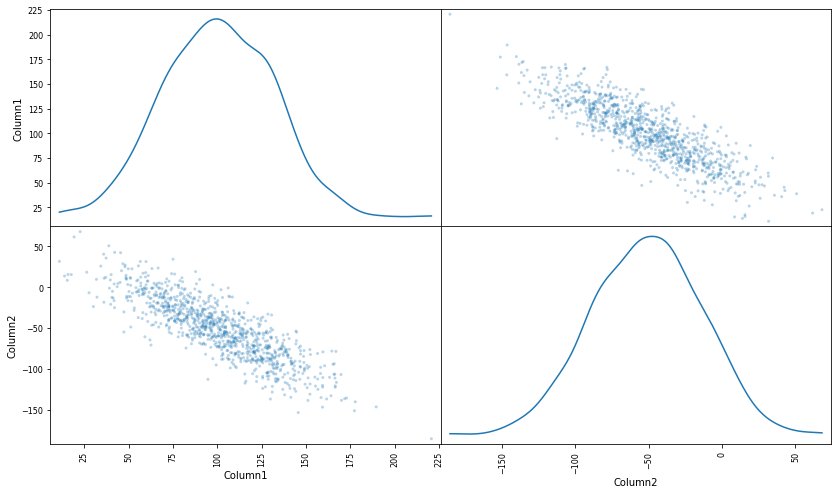

In [105]:
scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
pyplot.show()

#### X-Y Plots With a Regression Line

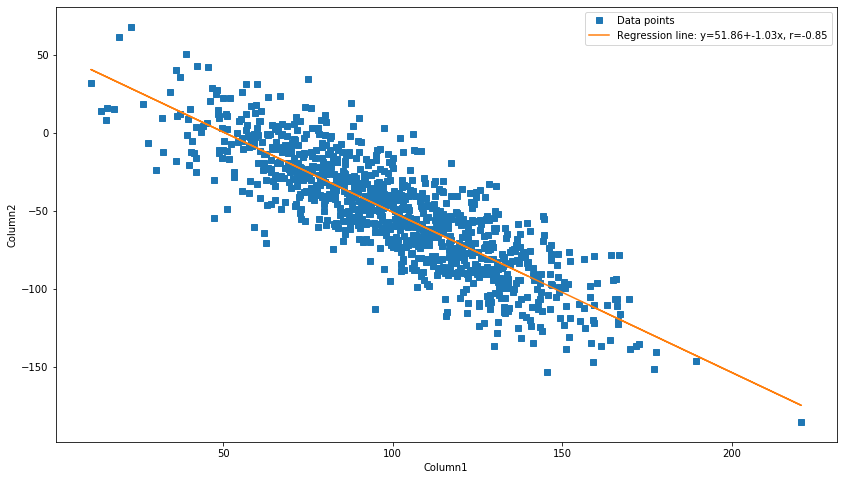

In [113]:
# creating X-Y Plots With a Regression Line
slope, intercept, r, p, stderr = scipy.stats.linregress(df['Column1'], df['Column2'])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = pyplot.subplots(figsize = (14,8))
ax.plot(df['Column1'], df['Column2'], linewidth=0, marker='s', label='Data points')
ax.plot(df['Column1'], intercept + slope * df['Column1'], label=line)
ax.set_xlabel('Column1')
ax.set_ylabel('Column2')
ax.legend(facecolor='white')
pyplot.show()

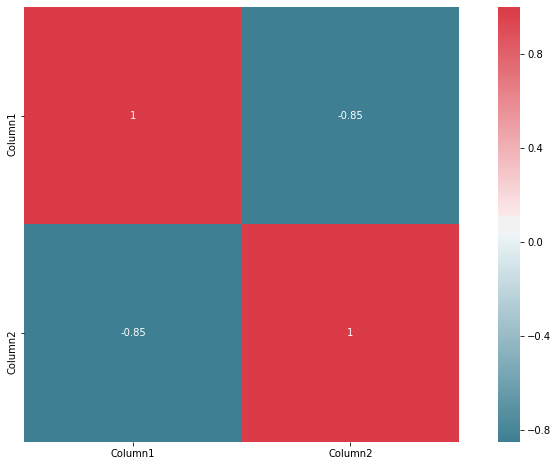

In [121]:
import seaborn as sns

f, ax = pyplot.subplots(figsize=(14, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, ax=ax)